### *                                   CREDIT CARD DEFAULT PREDICTION          *

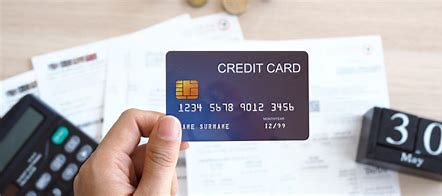

### About Dataset

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

#### IMPORTING LIBRARIES.

In [1]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import *

In [2]:
from pyspark.sql import SparkSession

spark= SparkSession.builder.appName("Pyspark").getOrCreate()

In [3]:
data=spark.read.csv(r"C:\Users\allkrish\OneDrive - Capgemini\Desktop\Pyspark\creditcard.csv",inferSchema=True,header=True)

In [4]:
data.show(1,vertical=True)

-RECORD 0---------------------
 Time   | 0.0                 
 V1     | -1.3598071336738    
 V2     | -0.0727811733098497 
 V3     | 2.53634673796914    
 V4     | 1.37815522427443    
 V5     | -0.338320769942518  
 V6     | 0.462387777762292   
 V7     | 0.239598554061257   
 V8     | 0.0986979012610507  
 V9     | 0.363786969611213   
 V10    | 0.0907941719789316  
 V11    | -0.551599533260813  
 V12    | -0.617800855762348  
 V13    | -0.991389847235408  
 V14    | -0.311169353699879  
 V15    | 1.46817697209427    
 V16    | -0.470400525259478  
 V17    | 0.207971241929242   
 V18    | 0.0257905801985591  
 V19    | 0.403992960255733   
 V20    | 0.251412098239705   
 V21    | -0.018306777944153  
 V22    | 0.277837575558899   
 V23    | -0.110473910188767  
 V24    | 0.0669280749146731  
 V25    | 0.128539358273528   
 V26    | -0.189114843888824  
 V27    | 0.133558376740387   
 V28    | -0.0210530534538215 
 Amount | 149.62              
 Class  | 0                   
only sho

In [5]:
data.head()

Row(Time=0.0, V1=-1.3598071336738, V2=-0.0727811733098497, V3=2.53634673796914, V4=1.37815522427443, V5=-0.338320769942518, V6=0.462387777762292, V7=0.239598554061257, V8=0.0986979012610507, V9=0.363786969611213, V10=0.0907941719789316, V11=-0.551599533260813, V12=-0.617800855762348, V13=-0.991389847235408, V14=-0.311169353699879, V15=1.46817697209427, V16=-0.470400525259478, V17=0.207971241929242, V18=0.0257905801985591, V19=0.403992960255733, V20=0.251412098239705, V21=-0.018306777944153, V22=0.277837575558899, V23=-0.110473910188767, V24=0.0669280749146731, V25=0.128539358273528, V26=-0.189114843888824, V27=0.133558376740387, V28=-0.0210530534538215, Amount=149.62, Class=0)

In [6]:
data.count()

284807

In [7]:
data.dtypes

[('Time', 'double'),
 ('V1', 'double'),
 ('V2', 'double'),
 ('V3', 'double'),
 ('V4', 'double'),
 ('V5', 'double'),
 ('V6', 'double'),
 ('V7', 'double'),
 ('V8', 'double'),
 ('V9', 'double'),
 ('V10', 'double'),
 ('V11', 'double'),
 ('V12', 'double'),
 ('V13', 'double'),
 ('V14', 'double'),
 ('V15', 'double'),
 ('V16', 'double'),
 ('V17', 'double'),
 ('V18', 'double'),
 ('V19', 'double'),
 ('V20', 'double'),
 ('V21', 'double'),
 ('V22', 'double'),
 ('V23', 'double'),
 ('V24', 'double'),
 ('V25', 'double'),
 ('V26', 'double'),
 ('V27', 'double'),
 ('V28', 'double'),
 ('Amount', 'double'),
 ('Class', 'int')]

Every column in the dataset are in the required datatype.so, we No need to change datatypes..

In [8]:
data.printSchema()

root
 |-- Time: double (nullable = true)
 |-- V1: double (nullable = true)
 |-- V2: double (nullable = true)
 |-- V3: double (nullable = true)
 |-- V4: double (nullable = true)
 |-- V5: double (nullable = true)
 |-- V6: double (nullable = true)
 |-- V7: double (nullable = true)
 |-- V8: double (nullable = true)
 |-- V9: double (nullable = true)
 |-- V10: double (nullable = true)
 |-- V11: double (nullable = true)
 |-- V12: double (nullable = true)
 |-- V13: double (nullable = true)
 |-- V14: double (nullable = true)
 |-- V15: double (nullable = true)
 |-- V16: double (nullable = true)
 |-- V17: double (nullable = true)
 |-- V18: double (nullable = true)
 |-- V19: double (nullable = true)
 |-- V20: double (nullable = true)
 |-- V21: double (nullable = true)
 |-- V22: double (nullable = true)
 |-- V23: double (nullable = true)
 |-- V24: double (nullable = true)
 |-- V25: double (nullable = true)
 |-- V26: double (nullable = true)
 |-- V27: double (nullable = true)
 |-- V28: double (nulla

In [9]:
data.columns

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

In [10]:
from pyspark.sql.functions import col, sum
# Calculate the count of null values in the entire DataFrame
null_counts = data.select([sum(col(column).isNull().cast("integer")).alias(column) for column in data.columns])

# Display the result
null_counts.show()

+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+------+-----+
|Time| V1| V2| V3| V4| V5| V6| V7| V8| V9|V10|V11|V12|V13|V14|V15|V16|V17|V18|V19|V20|V21|V22|V23|V24|V25|V26|V27|V28|Amount|Class|
+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+------+-----+
|   0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|     0|    0|
+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+------+-----+



There are NO NULL VALUES in the entire dataset...so, "HAPPY 🙃🙃🙃"

#### Data Processing

In [11]:
data.select("Class").show()

+-----+
|Class|
+-----+
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
+-----+
only showing top 20 rows



In [12]:
data.groupBy('Class').count().show()

+-----+------+
|Class| count|
+-----+------+
|    1|   492|
|    0|284315|
+-----+------+



There are 284315 records belongs to Class 0 but only 492 records belong to Class 1

In [13]:
target_col=data.groupBy('Class').count().toPandas()

   Class   count
0      1     492
1      0  284315


<BarContainer object of 2 artists>

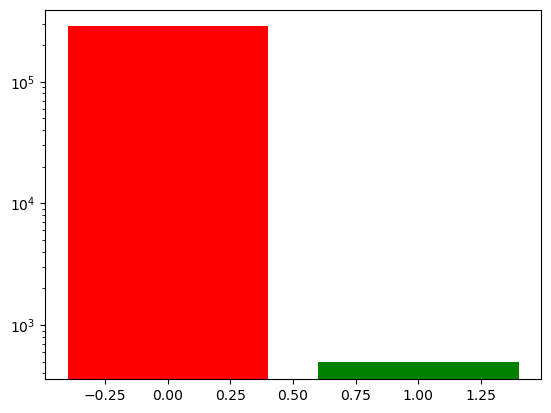

In [14]:
import matplotlib.pyplot as plt
print(target_col)
#plt.pie(target_col['count'],labels=target_col['Class'],normalize=True)
plt.yscale('log')
plt.bar(target_col['Class'],target_col['count'],color=['green','red'])

In [15]:
# from pandas_profiling import ProfileReport
# #import pandas_profiling
# profile = ProfileReport(final_df)

# profile.to_file(output_file='report.html')

In [16]:
from pyspark.ml.feature import VectorAssembler

vectors = VectorAssembler(inputCols=['Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount'],outputCol="Input")

output = vectors.transform(data)

In [17]:
output.show(1)

+----+----------------+-------------------+----------------+----------------+------------------+-----------------+-----------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+----------------+------------------+-----------------+------------------+-----------------+-----------------+------------------+-----------------+------------------+------------------+-----------------+------------------+-----------------+-------------------+------+-----+--------------------+
|Time|              V1|                 V2|              V3|              V4|                V5|               V6|               V7|                V8|               V9|               V10|               V11|               V12|               V13|               V14|             V15|               V16|              V17|               V18|              V19|              V20|               V21|              V22|               V23|             

In [18]:
output.select("input").show(1)

+--------------------+
|               input|
+--------------------+
|[0.0,-1.359807133...|
+--------------------+
only showing top 1 row



In [19]:
final_data= output.select("input","Class")

In [20]:
final_data.show(1)

+--------------------+-----+
|               input|Class|
+--------------------+-----+
|[0.0,-1.359807133...|    0|
+--------------------+-----+
only showing top 1 row



In [21]:
from pyspark.ml.classification import LogisticRegression
train_data,test_data= final_data.randomSplit([0.70,0.30])
lr = LogisticRegression(featuresCol='input',labelCol='Class')
lr=lr.fit(train_data)
predictions=lr.transform(test_data)

In [22]:
pred_result = lr.evaluate(test_data)
pred_result.predictions.show(5)

+--------------------+-----+--------------------+--------------------+----------+
|               input|Class|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[0.0,-1.359807133...|    0|[6.41958418421015...|[0.99837331681298...|       0.0|
|[0.0,1.1918571113...|    0|[6.59033381285155...|[0.99862830276978...|       0.0|
|[1.0,-1.358354061...|    0|[6.28090291892491...|[0.99813178692397...|       0.0|
|[1.0,-0.966271711...|    0|[6.63163362986958...|[0.99868372667022...|       0.0|
|[2.0,-0.425965884...|    0|[6.51709623887525...|[0.99852422662162...|       0.0|
+--------------------+-----+--------------------+--------------------+----------+
only showing top 5 rows



#### Model Evaluation

In [43]:
# ridge = LogisticRegression(featuresCol='input',labelCol='Class',maxIter=5,elasticNetParam=0,regParam=0.03)

# model = ridge.fit(train_data)
# pred = model.transform(test_data)
# #evaluator.evaluate(pred)

In [44]:
from pyspark.ml.evaluation import *

#dt_hyper_eval = BinaryClassificationEvaluator(predictionAndLabels)
dt_hyper_eval2= MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="Class")
dt_hyper_ACC  = dt_hyper_eval2.evaluate(pred, {dt_hyper_eval2.metricName:"accuracy"})

print("Accuracy = %0.2f" % dt_hyper_ACC)

Accuracy = 1.00


In [45]:
dt_hyper_eval = BinaryClassificationEvaluator(rawPredictionCol="probability", labelCol="Class")
dt_hyper_AUC  = dt_hyper_eval.evaluate(pred)
print("AUC = %.2f" % dt_hyper_AUC)

AUC = 0.98


In [26]:
cm_dt_result = pred.crosstab("prediction", "Class")
cm_dt_result = cm_dt_result.toPandas()
cm_dt_result
cm_dt_result.sort_values(by = ['prediction_Class'])

,prediction_Class,0,1
1,0.0,85034,110
0,1.0,12,53


In [46]:
TP = cm_dt_result["1"][0]
FP = cm_dt_result["0"][0]
TN = cm_dt_result["0"][1]
FN = cm_dt_result["1"][1]
Accuracy = (TP+TN)/(TP+FP+TN+FN)
recall = TP/(TP+FN)
Precision = TP/(TP+FP)

print ("Accuracy = %0.2f" %Accuracy )
print ("recall = %0.2f" %recall )
print ("Precision = %0.2f" %Precision )

Accuracy = 1.00
recall = 0.33
Precision = 0.82


In [28]:
# from pyspark.ml.classification import RandomForestClassifier
# rf = RandomForestClassifier(featuresCol='input',labelCol='Class')
# model = rf.fit(train_data)
# print(model.featureImportances)

In [29]:
# from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import VectorAssembler
# Load training data
data = spark.read.csv(r"C:\Users\allkrish\OneDrive - Capgemini\Desktop\Pyspark\creditcard.csv",inferSchema=True,header=True)
data.columns


vectors = VectorAssembler(inputCols=['Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount'],outputCol="features")

#print("here")
output = vectors.transform(data)
final_data= output.select("features","Class")
final_data
(train_data, test_data) = final_data.randomSplit([0.7, 0.3])
train_data.show(2)
# # Train a RandomForestClassifier model



+--------------------+-----+
|            features|Class|
+--------------------+-----+
|[0.0,-1.359807133...|    0|
|[0.0,1.1918571113...|    0|
+--------------------+-----+
only showing top 2 rows



In [30]:
# rf = RandomForestClassifier(numTrees=10, maxDepth=5, labelCol="Class", seed=42)
# model = rf.fit(train_data)

# # # Calculate feature importances
# importances = model.featureImportances

# # # Print the feature importances
# print(importances)

#BinaryClassificationEvaluator does not support the "accuracy" metric. To calculate accuracy in binary classification,
#you can use the MulticlassClassificationEvaluator with the "accuracy" metric instead. 


In [38]:
from pyspark.ml.classification import LogisticRegression, DecisionTreeClassifier, RandomForestClassifier


lr = LogisticRegression(labelCol="Class")
dt = DecisionTreeClassifier(labelCol="Class")
rf = RandomForestClassifier(labelCol="Class")



# Fit  models to the training data
lr_model = lr.fit(train_data)
dt_model = dt.fit(train_data)
rf_model = rf.fit(train_data)



# Make predictions on the test data
lr_predictions = lr_model.transform(test_data)
dt_predictions = dt_model.transform(test_data)
rf_predictions = rf_model.transform(test_data)




In [39]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Evaluate the performance of the models
lr_evaluator = MulticlassClassificationEvaluator(labelCol="Class", metricName="accuracy")
dt_evaluator = MulticlassClassificationEvaluator(labelCol="Class", metricName="accuracy")
rf_evaluator = MulticlassClassificationEvaluator(labelCol="Class", metricName="accuracy")


lr_accuracy = lr_evaluator.evaluate(lr_predictions)
dt_accuracy = dt_evaluator.evaluate(dt_predictions)
rf_accuracy = rf_evaluator.evaluate(rf_predictions)
gbt_accuracy = gbt_evaluator.evaluate(gbt_predictions)


print("Logistic Regression accuracy: ", lr_accuracy)
print("Decision Tree accuracy: ", dt_accuracy)
print("Random Forest accuracy: ", rf_accuracy)





Logistic Regression accuracy:  0.9992480849663988
Decision Tree accuracy:  0.9992833309835989
Random Forest accuracy:  0.999389069035199


In [40]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Create the evaluator
evaluator = MulticlassClassificationEvaluator(labelCol="Class")

# Evaluate the performance of the models
lr_precision = evaluator.evaluate(lr_predictions, {evaluator.metricName: "weightedPrecision"})
lr_recall = evaluator.evaluate(lr_predictions, {evaluator.metricName: "weightedRecall"})
lr_f1_score = evaluator.evaluate(lr_predictions, {evaluator.metricName: "f1"})

dt_precision = evaluator.evaluate(dt_predictions, {evaluator.metricName: "weightedPrecision"})
dt_recall = evaluator.evaluate(dt_predictions, {evaluator.metricName: "weightedRecall"})
dt_f1_score = evaluator.evaluate(dt_predictions, {evaluator.metricName: "f1"})

rf_precision = evaluator.evaluate(rf_predictions, {evaluator.metricName: "weightedPrecision"})
rf_recall = evaluator.evaluate(rf_predictions, {evaluator.metricName: "weightedRecall"})
rf_f1_score = evaluator.evaluate(rf_predictions, {evaluator.metricName: "f1"})



print("Logistic Regression precision: ", lr_precision)
print("Logistic Regression recall: ", lr_recall)
print("Logistic Regression F1-score: ", lr_f1_score)

print("Decision Tree precision: ", dt_precision)
print("Decision Tree recall: ", dt_recall)
print("Decision Tree F1-score: ", dt_f1_score)

print("Random Forest precision: ", rf_precision)
print("Random Forest recall: ", rf_recall)
print("Random Forest F1-score: ", rf_f1_score)



Logistic Regression precision:  0.9991965327863316
Logistic Regression recall:  0.9992480849663988
Logistic Regression F1-score:  0.9991936408293344
Decision Tree precision:  0.9992430379869226
Decision Tree recall:  0.9992833309835989
Decision Tree F1-score:  0.9992536260701684
Random Forest precision:  0.9993619205712433
Random Forest recall:  0.999389069035199
Random Forest F1-score:  0.9993696035913697
